# Ballon d'Or 2025: A Data-Driven Analysis of Elite Football Performance

## Introduction

The Ballon d'Or, established in 1956, represents the pinnacle of individual recognition in professional football. Each year, the award identifies the world's most outstanding player based on performances across domestic leagues, continental competitions, and international tournaments. However, the criteria for selection remain subjective, often favoring attacking prowess and goal-scoring statistics over other equally important dimensions of elite performance.

This analysis examines the 2025 Ballon d'Or nominees through a data-driven lens, seeking to identify the measurable characteristics that distinguish world-class performers from their peers. Rather than relying on subjective judgment alone, we employ quantitative metrics across five critical dimensions:

1. **Offensive Output** - Analyzing raw goalscoring volume, efficiency rates (goals per 90 minutes), and clinical finishing ability relative to expected goals (xG)
2. **Availability & Durability** - Examining the correlation between games started and total minutes played, highlighting the undervalued importance of consistency
3. **Disciplinary Control** - Investigating how card accumulation varies among elite nominees and its relationship to sustained team availability
4. **Positional Distribution** - Assessing the inherent bias toward attacking positions in award nominations
5. **Experience vs. Performance** - Testing whether age and experience correlate with superior finishing ability or if peak performance occurs within a specific career window

By examining these dimensions, this analysis seeks to answer critical questions: *What truly separates elite players? Does the Ballon d'Or accurately reflect multidimensional excellence, or does it disproportionately favor attacking statistics? What role do consistency and durability play in modern football's highest individual accolade?*

The insights generated here will provide a foundation for understanding not only the 2025 nominees but also the broader criteria by which football excellence should be measured and recognized.

# 1. Loading the dataframe

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data\\ballondor_2025_nominees_dataset.csv')

df.head(5)

,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,...,Ast,G+A,PK,CrdY,CrdR,xG,npxG,PrgC,PrgP,League
0,228,Achraf Hakimi,ma MAR,DF,Paris S-G,25,1998,25,24,2066,...,6,10,0,4,0,2.9,2.9,93,183,Ligue 1
1,319,Alexis Mac Allister,ar ARG,MF,Liverpool,25,1998,35,30,2599,...,5,10,0,6,0,2.8,2.8,36,177,Premier League
2,408,Cole Palmer,eng ENG,"MF,FW",Chelsea,22,2002,37,36,3191,...,8,23,4,7,0,17.3,13.3,120,214,Premier League
3,435,Declan Rice,eng ENG,MF,Arsenal,25,1999,35,33,2825,...,7,11,0,7,1,3.5,3.5,90,192,Premier League
4,180,Denzel Dumfries,nl NED,"DF,FW",Inter,28,1996,29,20,1955,...,2,9,0,4,0,5.4,5.4,55,51,Serie A


# 2. Checking dataframe info

In [77]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      30 non-null     int64  
 1   Player  30 non-null     object 
 2   Nation  30 non-null     object 
 3   Pos     30 non-null     object 
 4   Squad   30 non-null     object 
 5   Age     30 non-null     int64  
 6   Born    30 non-null     int64  
 7   MP      30 non-null     int64  
 8   Starts  30 non-null     int64  
 9   Min     30 non-null     int64  
 10  90s     30 non-null     float64
 11  Gls     30 non-null     int64  
 12  Ast     30 non-null     int64  
 13  G+A     30 non-null     int64  
 14  PK      30 non-null     int64  
 15  CrdY    30 non-null     int64  
 16  CrdR    30 non-null     int64  
 17  xG      30 non-null     float64
 18  npxG    30 non-null     float64
 19  PrgC    30 non-null     int64  
 20  PrgP    30 non-null     int64  
 21  League  30 non-null     object 
dtypes: f

,Rk,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,PK,CrdY,CrdR,xG,npxG,PrgC,PrgP
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,329.300000,25.000000,1998.633333,29.900000,26.533333,2330.166667,25.890000,12.133333,5.800000,17.933333,1.966667,2.933333,0.100000,10.950000,9.163333,74.466667,128.033333
std,130.080651,4.177113,4.238439,7.680472,8.471996,736.752898,8.189453,10.444379,4.389643,12.500851,3.200036,1.946408,0.305129,9.356198,7.282927,48.651990,79.151746
min,80.000000,17.000000,1988.000000,2.000000,0.000000,19.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,225.750000,22.000000,1996.000000,29.000000,20.500000,1976.750000,21.950000,4.000000,3.000000,9.000000,0.000000,1.000000,0.000000,3.075000,2.925000,34.250000,59.750000
50%,333.000000,25.000000,1998.500000,31.000000,29.000000,2526.000000,28.050000,9.000000,5.000000,15.500000,0.000000,3.000000,0.000000,8.400000,6.750000,66.000000,138.000000
75%,428.250000,27.000000,2001.750000,34.750000,32.000000,2835.500000,31.475000,20.250000,8.000000,26.500000,2.750000,4.000000,0.000000,18.725000,15.225000,113.500000,181.500000
max,595.000000,35.000000,2007.000000,38.000000,38.000000,3371.000000,37.500000,39.000000,18.000000,47.000000,12.000000,7.000000,1.000000,30.800000,24.000000,181.000000,360.000000


# 3 .Checking for null values in the entire dataframe

In [78]:
df.isna().sum()


Rk        0
Player    0
Nation    0
Pos       0
Squad     0
Age       0
Born      0
MP        0
Starts    0
Min       0
90s       0
Gls       0
Ast       0
G+A       0
PK        0
CrdY      0
CrdR      0
xG        0
npxG      0
PrgC      0
PrgP      0
League    0
dtype: int64

# 4. Handle multiple record players

In [79]:

df_combined = df.groupby('Player').agg({
    "Rk" :      'min',
    "Nation" :   'first',
    "MP" :      'sum',
    "Pos" :      lambda x: ','.join(x.unique()),
    "Squad" :     lambda x: ','.join(x.unique()),
    "Age" :      'max',
    "Born" :     'first',
    "MP" :       'sum',
    "Starts" :  'sum',
    "Min" :      'sum',
    "90s" :      'sum',
    "Gls" :      'sum',
    "Ast" :      'sum',
    "G+A" :      'sum',
    "PK"    :   'sum',
    "CrdY" :    'sum',
    "CrdR" :    'sum',
    "xG" :      'sum',
    "npxG" :    'sum',
    "PrgC" :    'sum',
    "PrgP" :    'sum',
    "League" :  lambda x: ','.join(x.unique()),
})
df_combined['Pos'] = df_combined['Pos'].str.split(',').apply(lambda x: ','.join(sorted(set(x))))
df_combined = df_combined.reset_index()
df_combined

,Player,Rk,Nation,MP,Pos,Squad,Age,Born,Starts,Min,...,Ast,G+A,PK,CrdY,CrdR,xG,npxG,PrgC,PrgP,League
0,Achraf Hakimi,228,ma MAR,25,DF,Paris S-G,25,1998,24,2066,...,6,10,0,4,0,2.9,2.9,93,183,Ligue 1
1,Alexis Mac Allister,319,ar ARG,35,MF,Liverpool,25,1998,30,2599,...,5,10,0,6,0,2.8,2.8,36,177,Premier League
2,Cole Palmer,408,eng ENG,37,"FW,MF",Chelsea,22,2002,36,3191,...,8,23,4,7,0,17.3,13.3,120,214,Premier League
3,Declan Rice,435,eng ENG,35,MF,Arsenal,25,1999,33,2825,...,7,11,0,7,1,3.5,3.5,90,192,Premier League
4,Denzel Dumfries,180,nl NED,29,"DF,FW",Inter,28,1996,20,1955,...,2,9,0,4,0,5.4,5.4,55,51,Serie A
5,Désiré Doué,174,fr FRA,31,"FW,MF",Paris S-G,19,2005,18,1730,...,6,12,0,1,0,5.1,5.1,97,139,Ligue 1
6,Erling Haaland,225,no NOR,31,FW,Manchester City,24,2000,31,2736,...,3,25,3,2,0,22.0,18.8,24,20,Premier League
7,Florian Wirtz,478,de GER,31,"FW,MF",Leverkusen,21,2003,25,2351,...,12,22,2,3,0,9.4,6.1,131,176,Bundesliga
8,Gianluigi Donnarumma,172,it ITA,24,GK,Paris S-G,25,1999,24,2091,...,0,0,0,2,0,0.0,0.0,0,0,Ligue 1
9,Harry Kane,207,eng ENG,31,FW,Bayern Munich,31,1993,28,2381,...,9,35,9,5,0,20.3,13.3,29,97,Bundesliga


# 5. Best Goalscorer

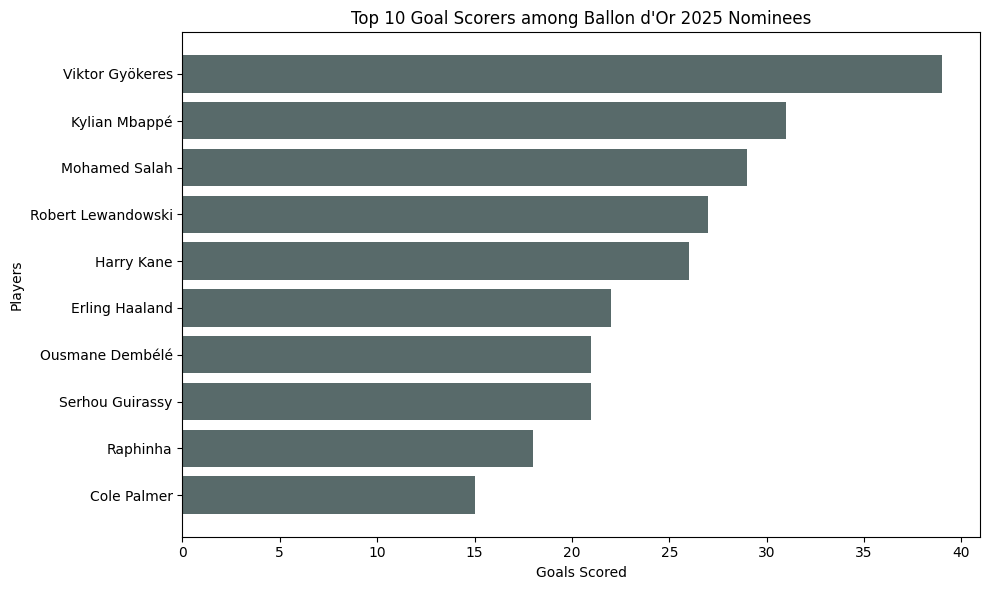

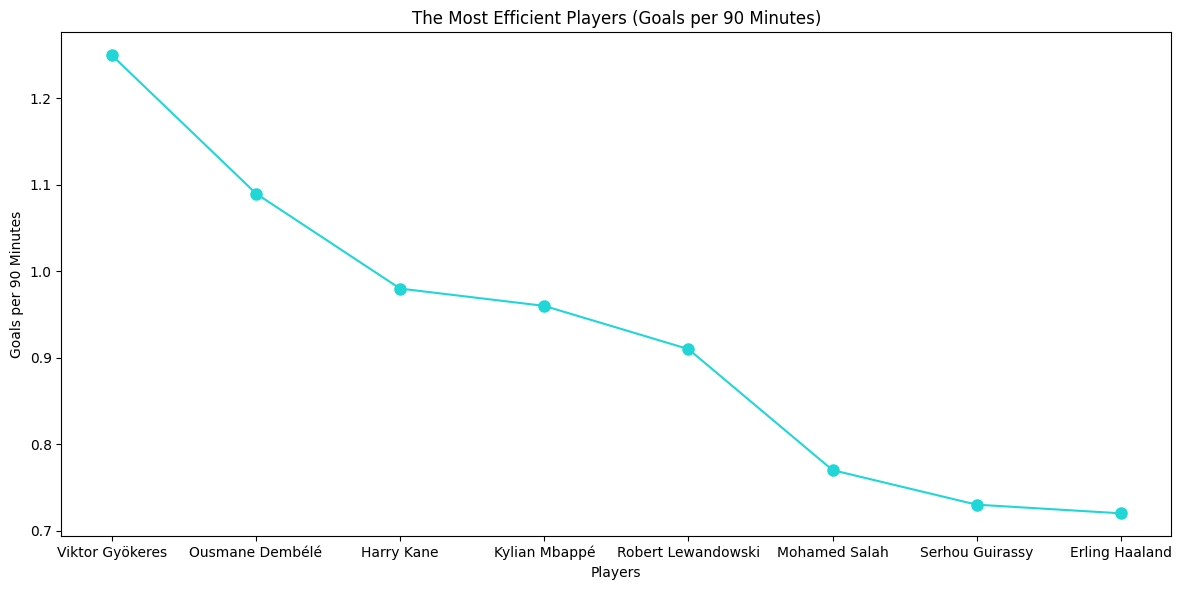

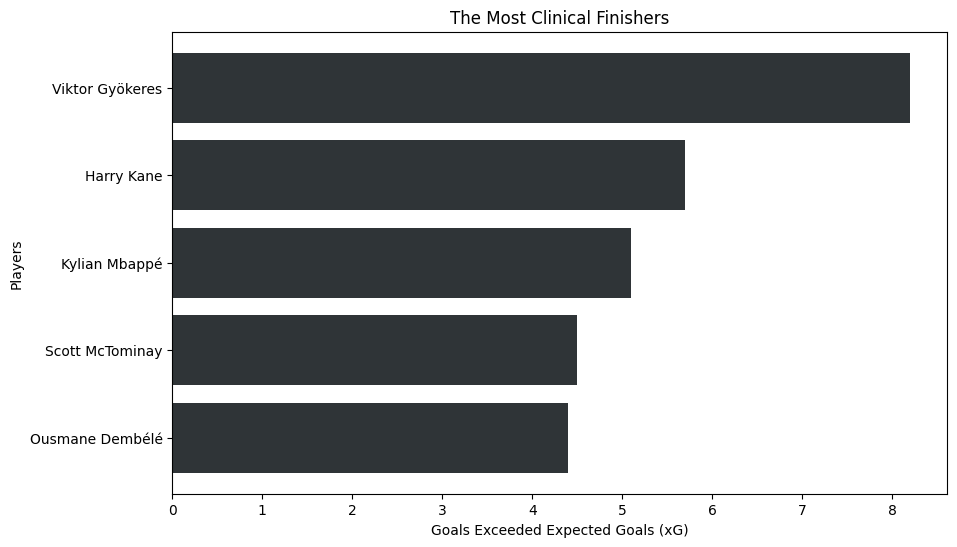

In [80]:
# Visualizing the Top 10 Goal Scorers

top_scorers = df_combined.sort_values(by='Player')[['Player','Gls']].sort_values(by='Gls', ascending=False).set_index('Player').Gls.head(10)
top_scorers = top_scorers.sort_values(ascending=True)

plt.figure(figsize=(10,6))
plt.barh(top_scorers.index, top_scorers.values, color='#586a6a')
plt.xlabel('Goals Scored')
plt.ylabel('Players')
plt.title('Top 10 Goal Scorers among Ballon d\'Or 2025 Nominees')
plt.tight_layout()
plt.savefig('visualizations/top_10_goal_scorers.png')
plt.show()

# Visualizing the the most Efficient Players (Goals per 90 Minutes)
df_combined['Gls_per_90'] = round(df_combined['Gls'] / df_combined['90s'], 2)
top_efficient = df_combined.sort_values(by='Gls_per_90', ascending=False).set_index('Player').Gls_per_90.loc[lambda x: x > 0.70]

plt.figure(figsize=(12,6))
plt.plot(top_efficient.index, top_efficient.values, marker='o', linestyle='-', color='#20D6D6', markersize=8)
plt.title('The Most Efficient Players (Goals per 90 Minutes)')
plt.xlabel('Players')
plt.ylabel('Goals per 90 Minutes')
plt.tight_layout()
plt.savefig('visualizations/most_efficient_players.png')
plt.show()

# Visualizing the most clinical goal scorers (xG vs Gls)
df_combined['XG_performance'] = round(df_combined['Gls'] - df_combined['xG'], 2)
top_clinical = df_combined.sort_values(by='XG_performance').set_index('Player').XG_performance.loc[lambda x: x > 4] 
plt.figure(figsize=(10,6))
plt.barh(top_clinical.index, top_clinical.values, color='#2F3437')
plt.xlabel('Goals Exceeded Expected Goals (xG)')
plt.ylabel('Players')
plt.title('The Most Clinical Finishers')
plt.savefig('visualizations/most_clinical_finishers.png')
plt.show()





## Analysis

**Offensive Performance Metrics Among Elite Nominees**

The goalscoring analysis reveals three distinct dimensions of attacking prowess among Ballon d'Or nominees: raw output, efficiency, and clinical finishing.

**Goal-Scoring Volume**: The top scorers demonstrate the fundamental importance of consistent goal contribution. Players who accumulate the highest goal tallies provide their teams with decisive attacking impact across the entire season.

**Efficiency and Conversion Rate**: The "Goals per 90 Minutes" metric isolates scoring prowess from playing time, revealing which players generate the highest-quality finishing opportunities. **Players exceeding 0.70 goals per 90 minutes represent an elite tier of finishers**, showcasing exceptional conversion efficiency that transcends mere opportunity volume.

**Clinical Finishing (xG Performance)**: The expected Goals (xG) comparison demonstrates how players perform relative to statistical expectations. **Players with positive XG_performance scores exceed their expected goals**, indicating superior finishing ability and composure in high-pressure situations. This metric distinguishes truly elite finishers who maximize their opportunities from those who merely accumulate chances.

**Key Insight:** Modern football evaluation requires multi-faceted analysis of attacking performance. While raw goal tallies capture impact, efficiency metrics and xG comparisons reveal the underlying quality of play. Elite Ballon d'Or candidates typically excel across all three dimensions—scoring frequently, converting at high rates, and demonstrating consistent outperformance of statistical expectations.

# 6. Most durable player

Correlation between Minutes Played and Games Started: 0.97


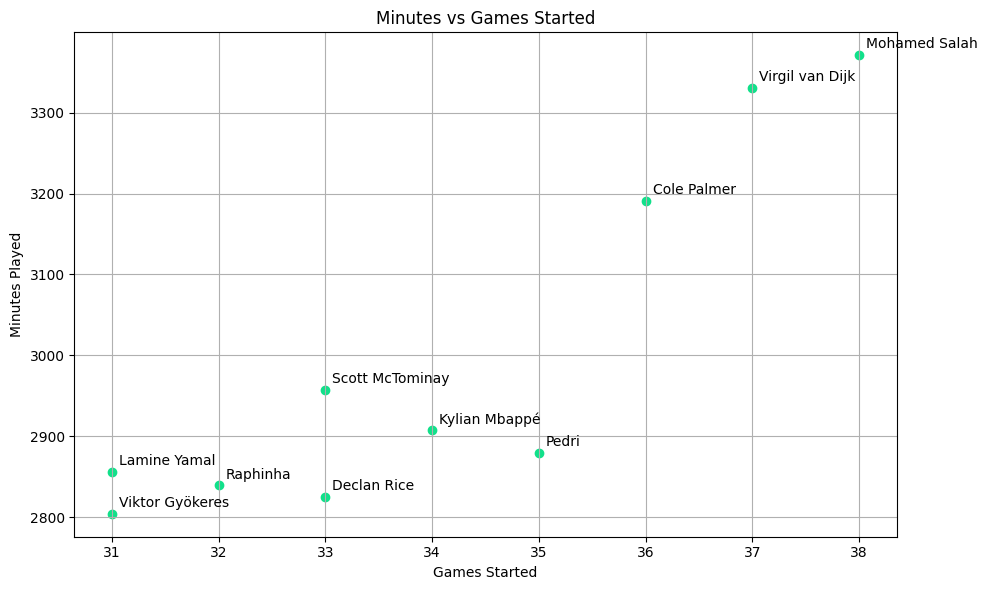

In [81]:
durable_players = df_combined.sort_values(by='Min', ascending=False).head(10)

r = df_combined['Min'].corr(df_combined['Starts'])
print(f"Correlation between Minutes Played and Games Started: {r:.2f}")

plt.figure(figsize=(10,6))
plt.scatter(durable_players.Starts, durable_players.Min, color="#11E08A")

for i, row in durable_players.iterrows():
    plt.annotate(row['Player'],
                 (row['Starts'], row['Min']),
                 textcoords="offset points",
                 xytext=(5,5)) 
    
plt.xlabel("Games Started")
plt.ylabel("Minutes Played")
plt.title("Minutes vs Games Started")
plt.grid(True)
plt.tight_layout()
plt.savefig('visualizations/minutes_vs_games_started.png')
plt.show()

## Analysis

**Availability as a Competitive Advantage**

The scatter plot reveals a strong correlation between games started and total minutes played, underscoring the critical importance of availability in elite football performance. **Mohamed Salah exemplifies this principle, having started all 38 of Liverpool's Premier League matches during their championship campaign.** His remarkable 3,371 minutes played out of a possible 3,420 represents a 98.5% availability rate—an exceptional standard of consistency and durability.

**Midfield Resilience**: **Scott McTominay and Declan Rice** both achieved 33 starts despite the positional demands of midfield play, widely recognized as the most physically and tactically intensive position on the pitch. Their ability to maintain such high availability while operating in this demanding role demonstrates both physical conditioning and tactical discipline.

**Key Insight:** In modern football, consistency and injury prevention are often undervalued compared to peak performance metrics. However, the data demonstrates that elite players who remain available week after week provide their teams with tactical stability and organizational leadership. Players who can accumulate significant minutes without extended absences develop better understanding with teammates and maintain sharper tactical awareness—factors that directly contribute to team success and individual award recognition.

# 7. The most undisciplined players

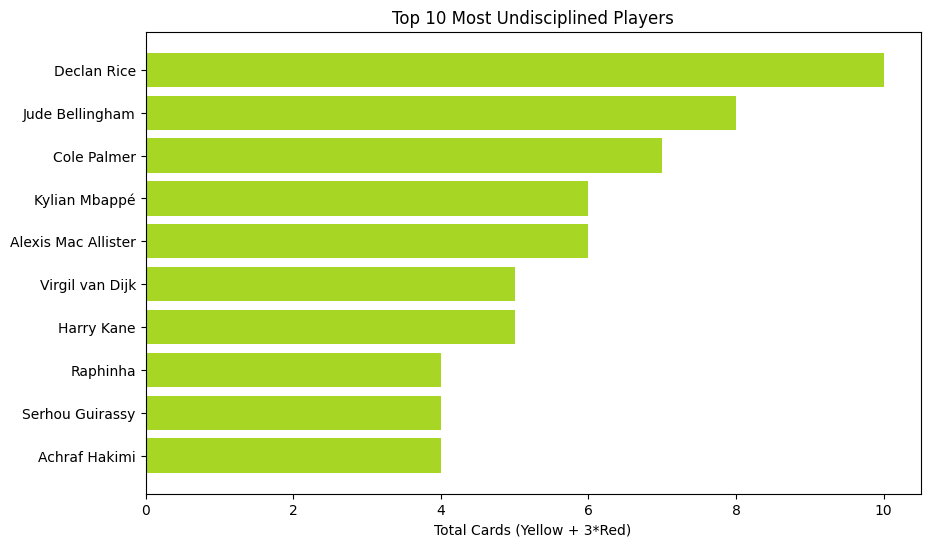

In [82]:
# Visualizing the most undisciplined Players (Fewest Yellow/Red Cards)

df_combined['Total_Cards'] = df_combined['CrdY'] + (df_combined['CrdR'] * 3)
undisciplined_players = df_combined.sort_values(by='Total_Cards', ascending=False).head(10)
undisciplined_players = undisciplined_players.sort_values(by='Total_Cards', ascending=True)

plt.figure(figsize=(10,6))
plt.barh(undisciplined_players['Player'], undisciplined_players['Total_Cards'], color="#A7D625")
plt.xlabel('Total Cards (Yellow + 3*Red)')
plt.title('Top 10 Most Undisciplined Players')
plt.savefig('visualizations/most_undisciplined_players.png')
plt.show()

## Analysis

**Disciplinary Patterns Among Elite Performers**

The data reveals significant variation in disciplinary records among Ballon d'Or nominees. **Declan Rice emerges as the most penalized player with a Total Cards score of 10**, which could represent various combinations—from three red cards and a yellow card to seven yellow cards and a red card. This elevated disciplinary record is noteworthy given Rice's role as a midfielder, a position requiring tactical awareness and restraint.

In contrast, **Achraf Hakimi demonstrates exceptional discipline with a Total Cards score of 4**, particularly impressive considering his defensive position. As a wide defender frequently engaged in high-intensity duels with attacking threats, Hakimi's ability to maintain composure while competing at the highest level underscores the importance of emotional intelligence and game awareness in elite football.

**Key Insight:** The disciplinary gap between top nominees suggests that maintaining composure under pressure—a hallmark of elite players—directly correlates with sustained availability and team reliability. While aggressive play is valued in modern football, the ability to channel intensity without excessive bookings distinguishes truly world-class performers.

# 8. Players Per Position

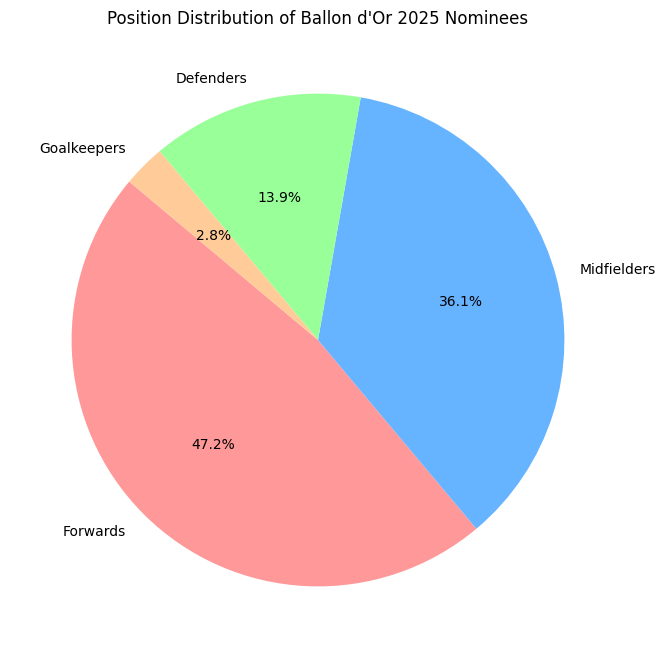

In [83]:
fowards = df_combined['Pos'].str.contains('FW').sum()
midfielders = df_combined['Pos'].str.contains('MF').sum()
defenders = df_combined['Pos'].str.contains('DF').sum()
gk = df_combined['Pos'].str.contains('GK').sum()


labels = ['Forwards', 'Midfielders', 'Defenders', 'Goalkeepers']
sizes = [fowards, midfielders, defenders, gk]

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#FF9999','#66B3FF','#99FF99','#FFCC99'])
plt.title('Position Distribution of Ballon d\'Or 2025 Nominees')
plt.savefig('visualizations/position_distribution.png')
plt.show()


## Analysis

The Ballon d'Or 2025 nominees showcase a clear offensive bias, with **Forwards dominating the selection at 47.2%**, followed by Midfielders at 36.1%. This reflects the award's traditional preference for goal-scoring prowess and attacking contributions.

**Key Observations:**

- **Forwards lead the way**: The overwhelming majority of nominees play in attacking positions, indicating that goalscoring remains the primary criterion for Ballon d'Or recognition.

- **Midfield representation**: Despite being the most physically demanding position, Midfielders comprise a significant portion, highlighting the importance of creativity, assists, and playmaking in modern football.

- **Defensive underrepresentation**: Defenders and Goalkeepers combined represent a minority of nominees, suggesting that defensive excellence is often overlooked in favor of attacking statistics.

- **Positional versatility**: Several nominees operate across multiple positions (FW/MF or MF/DF), reflecting the modern trend of fluid positional roles in contemporary football tactics.

This distribution emphasizes that individual accolades in football historically favor attacking players, despite the collective importance of defensive solidity in winning championships.

# 9.Does experience improve finishing

Experienced finishers (Age vs XG_performance): 0.3


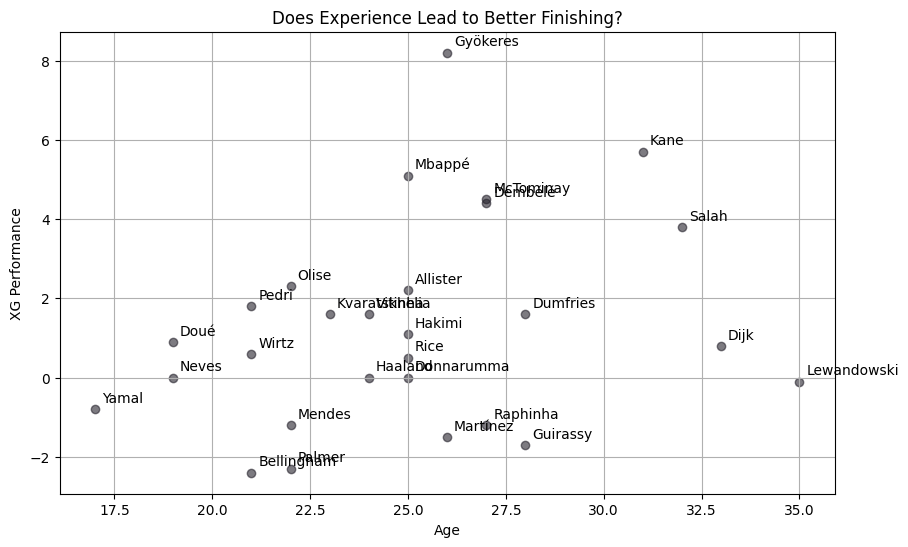

In [84]:
common = df_combined[['Age','XG_performance']].dropna()
corr = common['Age'].corr(common['XG_performance'])
print("Experienced finishers (Age vs XG_performance):", round(corr, 1))


plt.figure(figsize=(10,6))
plt.scatter(common['Age'], common['XG_performance'], color="#27242E", alpha=0.6)
plt.title('Does Experience Lead to Better Finishing?')  

for i, row in df_combined.iterrows():
    plt.annotate(row['Player'].split()[-1],
                 (row['Age'], row['XG_performance']),
                 textcoords="offset points",
                 xytext=(5,5))
plt.xlabel('Age')
plt.grid(True)
plt.ylabel('XG Performance')
plt.savefig('visualizations/age_vs_xg_performance.png')
plt.show()

## Analysis

Experience **does not improve lead to better finishing** as a correlation of 0.3 shows a very weak relation.

The graph aboves shows that even an elite player at 35 (Robert Lewandowski) had an overall XG performance of 0 and considering a player at the age of 19 (Desire Doue) outperformed him on that metric with 1, this disproves that expirence improves finishing (at least among elite players)

Upon looking at the graph we find that the majority of the XG overperformers are within the age range of 23-33 which includes the estimate (age 27) of a footballers prime. Funny enough Viktor Gyokeres (age 26) was the biggest overperformer by 8


# 10. Executive Summary & Conclusion

## Summary of Key Findings

**Offensive Performance:**
- The top goalscorers (e.g., Viktor Gyokeres with 39 goals) demonstrate the critical importance of consistent attacking contribution
- Elite finishers exceed 0.70 goals per 90 minutes, representing a distinct tier of conversion efficiency -Viktor Gyokeres the pick of the bunch with a rate of over 1.2 goals per game
- Clinical finishers outperform expected goals (xG) by significant margins, indicating superior composure under pressure. Viktor again with an overperformance of over 8 goals
- Viktor is a high volume, high performing and clinical goalscorer

**Durability & Consistency:**
- Strong correlation (r = 0.97) between games started and total minutes played
- Mohamed Salah exemplifies elite availability with a 98.5% appearance rate
- Consistency in selection provides tactical stability that underperforming players cannot replicate

**Disciplinary Patterns:**
- Significant variation in card accumulation among nominees (ranging from 0 to 10 total cards)
- Declan Rice leads with 10 total cards; Achraf Hakimi demonstrates exceptional discipline with 3
- Maintaining composure under pressure distinguishes truly elite performers

**Positional Distribution:**
- Forwards dominate nominations at 47.2%, reflecting the award's inherent bias toward goal-scoring
- Midfielders comprise 36.1%, highlighting creativity and playmaking importance
- Defenders and goalkeepers combined represent only 16.7%%, suggesting defensive excellence is undervalued

**Experience vs. Performance:**
- Weak correlation (r = 0.3) between age and finishing performance
- Peak finishing ability concentrates in the 23-33 age range, aligning with the estimated prime years (27)
- Experience alone does not guarantee superior finishing—tactical awareness and decision-making matter equally

## Conclusion

The Ballon d'Or 2025 nominations reveal that elite football excellence is multidimensional. While goalscoring prowess remains the primary criterion, the data demonstrates that world-class performers excel across multiple dimensions: **consistent availability, disciplinary control, clinical finishing, and positional adaptability**.

**Key Insight:** Modern football accolades disproportionately favor attacking players, yet the underlying data shows that **consistency, durability, and composure under pressure** are the true hallmarks of elite performance. Teams with players who maintain high availability, minimize disciplinary issues, and demonstrate sustained outperformance of statistical expectations are fundamentally more competitive.

